## Importing Packages

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.utils import resample


# Random Forest 
from sklearn.preprocessing import StandardScaler

#XGBoost
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

## Reading in the Data

In [137]:
df = pd.read_csv('data/filtered_data.csv')
# df = pd.read_csv('data/filtered_data_wider.csv')

In [138]:
df

,Unnamed: 0,gameid,GameDate,ab,pitchnum,inning,teambat,balls,strikes,outs,...,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name,strikeout_binary
0,8,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,32,4,4.0,1,1.0,2.0,1.0,...,5.260902,-0.114617,2.546066,115,Colorado Rockies,121,New York Mets,19,Coors Field,1
1,11,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,33,3,4.0,1,0.0,2.0,2.0,...,6.102530,0.880186,1.700091,115,Colorado Rockies,121,New York Mets,19,Coors Field,0
2,30,2021/04/21/pitmlb-detmlb-2,4/21/2021 17:40,45,4,6.0,1,1.0,2.0,0.0,...,-3.835304,-0.239593,2.348037,116,Detroit Tigers,134,Pittsburgh Pirates,2394,Comerica Park,0
3,33,2021/04/25/arimlb-atlmlb-1,4/25/2021 12:20,12,4,2.0,0,1.0,2.0,1.0,...,2.129060,1.028702,2.689594,144,Atlanta Braves,109,Arizona Diamondbacks,4705,Truist Park,0
4,38,2021/04/25/arimlb-atlmlb-1,4/25/2021 12:20,12,3,2.0,0,0.0,2.0,1.0,...,13.794325,1.286732,2.807080,144,Atlanta Braves,109,Arizona Diamondbacks,4705,Truist Park,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187400,717544,2023/08/30/clemlb-minmlb-1,8/30/2023 17:10,42,5,6.0,1,1.0,2.0,0.0,...,-3.927244,-0.362439,1.593713,142,Minnesota Twins,114,Cleveland Guardians,3312,Target Field,0
187401,717550,2023/08/30/atlmlb-colmlb-1,8/31/2023 0:40,37,3,5.0,1,0.0,2.0,0.0,...,4.477882,0.436818,1.588252,115,Colorado Rockies,144,Atlanta Braves,19,Coors Field,0
187402,717573,2023/08/30/arimlb-lanmlb-1,8/31/2023 2:10,34,5,4.0,1,1.0,2.0,0.0,...,14.275191,0.586442,1.884596,119,Los Angeles Dodgers,109,Arizona Diamondbacks,22,Dodger Stadium,0
187403,717576,2023/09/02/pitmlb-slnmlb-1,9/2/2023 23:15,54,4,7.0,0,1.0,2.0,0.0,...,14.733393,-0.807034,4.470551,138,St. Louis Cardinals,134,Pittsburgh Pirates,2889,Busch Stadium,0


## Filtering the DataFrame

In [139]:
data = df[["pitcher","pitchname", "pitchresult", "eventtype","spinrate", "relspeed", "horzbreak", "inducedvertbreak", "platelocside", "platelocheight", "strikeout_binary"]].copy()

In [140]:
data = data[data['pitchname'] == 'FF'].copy()

In [141]:
data['eventtype'].unique()

array(['ball', 'foul', 'single', 'field_out', 'grounded_into_double_play',
       'strikeout', 'force_out', 'hit_by_pitch', 'home_run', 'sac_fly',
       'double_play', 'double', 'stolen_base_2b', 'triple', 'sac_bunt',
       'field_error', 'caught_stealing_2b', 'wild_pitch',
       'defensive_indiff', 'passed_ball', 'fielders_choice_out',
       'pickoff_caught_stealing_2b', 'stolen_base_3b', 'fielders_choice',
       'swinging_strike', 'caught_stealing_home', 'strikeout_double_play',
       'catcher_interf', 'stolen_base_home', 'pickoff_attempt_1b',
       'sac_fly_double_play', 'pickoff_attempt_3b', 'pickoff_3b',
       'caught_stealing_3b', 'pickoff_attempt_2b', 'pickoff_1b',
       'triple_play'], dtype=object)

In [142]:
data = data[~data['eventtype'].isin(['field_out'])]
data

,pitcher,pitchname,pitchresult,eventtype,spinrate,relspeed,horzbreak,inducedvertbreak,platelocside,platelocheight,strikeout_binary
4,"Wilson, Bryse",FF,B,ball,2143.301025,94.614914,3.280700,13.794325,1.286732,2.807080,0
10,"Houck, Tanner",FF,F,foul,2164.971191,96.171303,9.286347,7.589095,0.122586,2.129726,0
13,"Barnes, Jacob",FF,D,single,2254.785645,93.305214,-2.640007,12.777637,0.605103,2.710316,0
17,"Houck, Tanner",FF,X,grounded_into_double_play,2082.749023,94.901627,8.153946,6.207467,-0.378895,3.240144,0
23,"Yajure, Miguel",FF,B,ball,2465.145264,90.507637,5.920645,17.932449,-0.729870,4.935426,0
...,...,...,...,...,...,...,...,...,...,...,...
187398,"Alcantara, Sandy",FF,E,home_run,2341.313232,99.597092,13.290255,14.944304,-0.707683,3.001816,0
187399,"Karinchak, James",FF,S,strikeout,2320.230225,94.827782,5.813662,19.101568,-0.477500,4.648829,1
187402,"Pfaadt, Brandon",FF,D,single,2501.821533,94.116440,3.854095,14.275191,0.586442,1.884596,0
187403,"Gallegos, Giovanny",FF,B,ball,2398.320557,93.521347,10.798670,14.733393,-0.807034,4.470551,0


# IF YOU UNCOMMENT, ONLY STRIKEOUTS AND BALLS

In [143]:
# Filter the DataFrame to only include the specified event types
# data = data[data['eventtype'].isin(['strikeout', 'strikeout_double_play', 'ball', 'passed ball'])]
# Define the list of events to remove
irrelevant_events = [
    'field_out', 'grounded_into_double_play', 'double_play', 'triple_play',
    'field_error', 'defensive_indiff', 'passed_ball', 'wild_pitch', 'catcher_interf'
]

# Filter out rows where 'eventtype' matches any of the specified events or contains specified patterns
data = data[
    ~data['eventtype'].isin(irrelevant_events) & 
    ~data['eventtype'].str.contains('caught_stealing') & 
    ~data['eventtype'].str.contains('stolen_base') & 
    ~data['eventtype'].str.contains('pickoff')
]

data = data[~data['eventtype'].str.contains('pickoff')]

# Display the filtered DataFrame
# data

In [144]:
data['eventtype'].value_counts()

eventtype
ball                     30123
foul                     20305
strikeout                14151
single                    3030
double                     877
home_run                   530
force_out                  325
hit_by_pitch               325
sac_fly                    149
triple                      78
fielders_choice             35
fielders_choice_out         32
sac_bunt                    20
strikeout_double_play       13
swinging_strike              6
sac_fly_double_play          2
Name: count, dtype: int64

In [217]:
len(data['eventtype'])

70001

In [145]:
data['eventtype'].unique()

array(['ball', 'foul', 'single', 'strikeout', 'force_out', 'hit_by_pitch',
       'home_run', 'sac_fly', 'double', 'triple', 'sac_bunt',
       'fielders_choice_out', 'fielders_choice', 'swinging_strike',
       'strikeout_double_play', 'sac_fly_double_play'], dtype=object)

### Looking at outliers

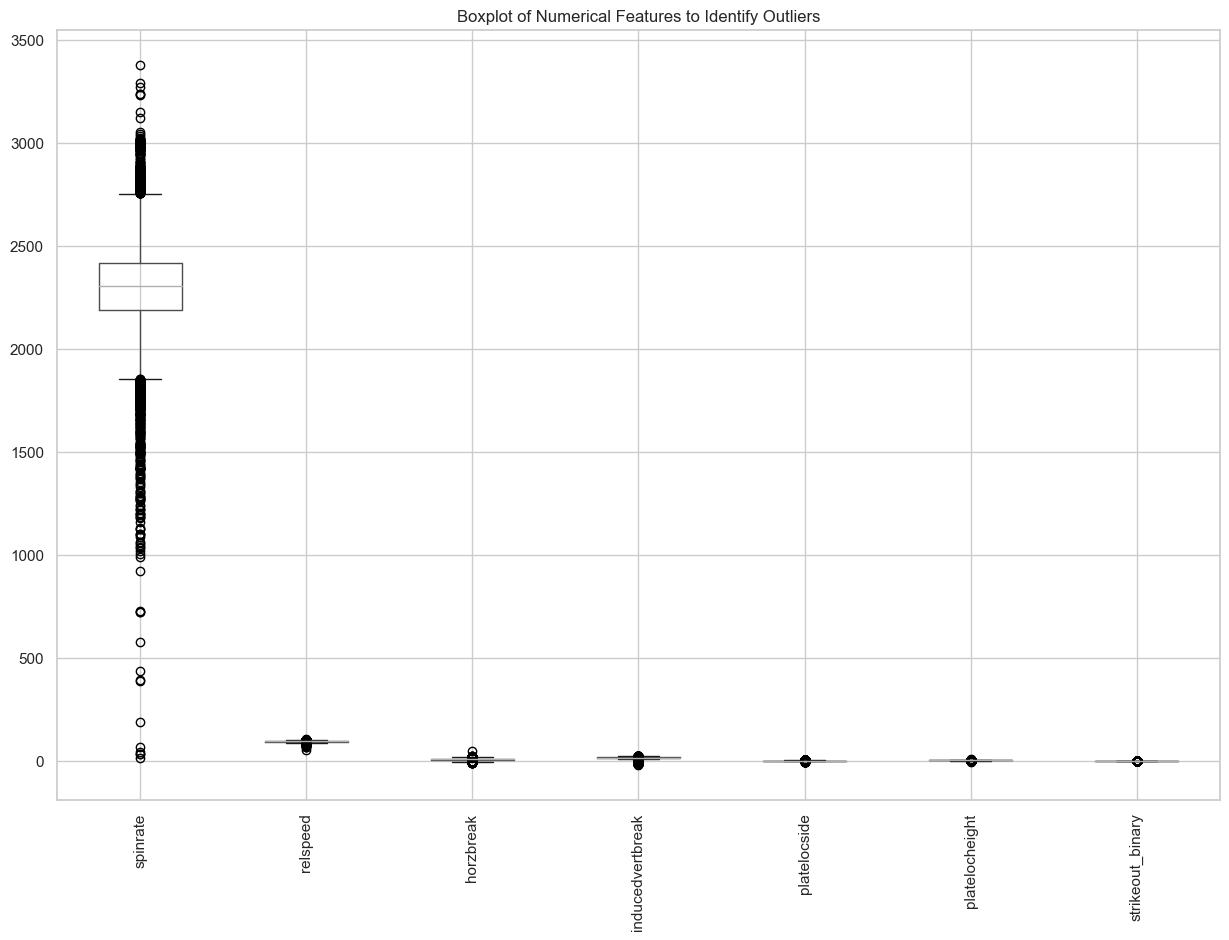

In [146]:
numerical_features = data.select_dtypes(include=[np.number]).columns
numerical_data = data[numerical_features]

# Plot boxplots for numerical features to visualize outliers
plt.figure(figsize=(15, 10))
numerical_data.boxplot(rot=90)
plt.title('Boxplot of Numerical Features to Identify Outliers')
plt.show()

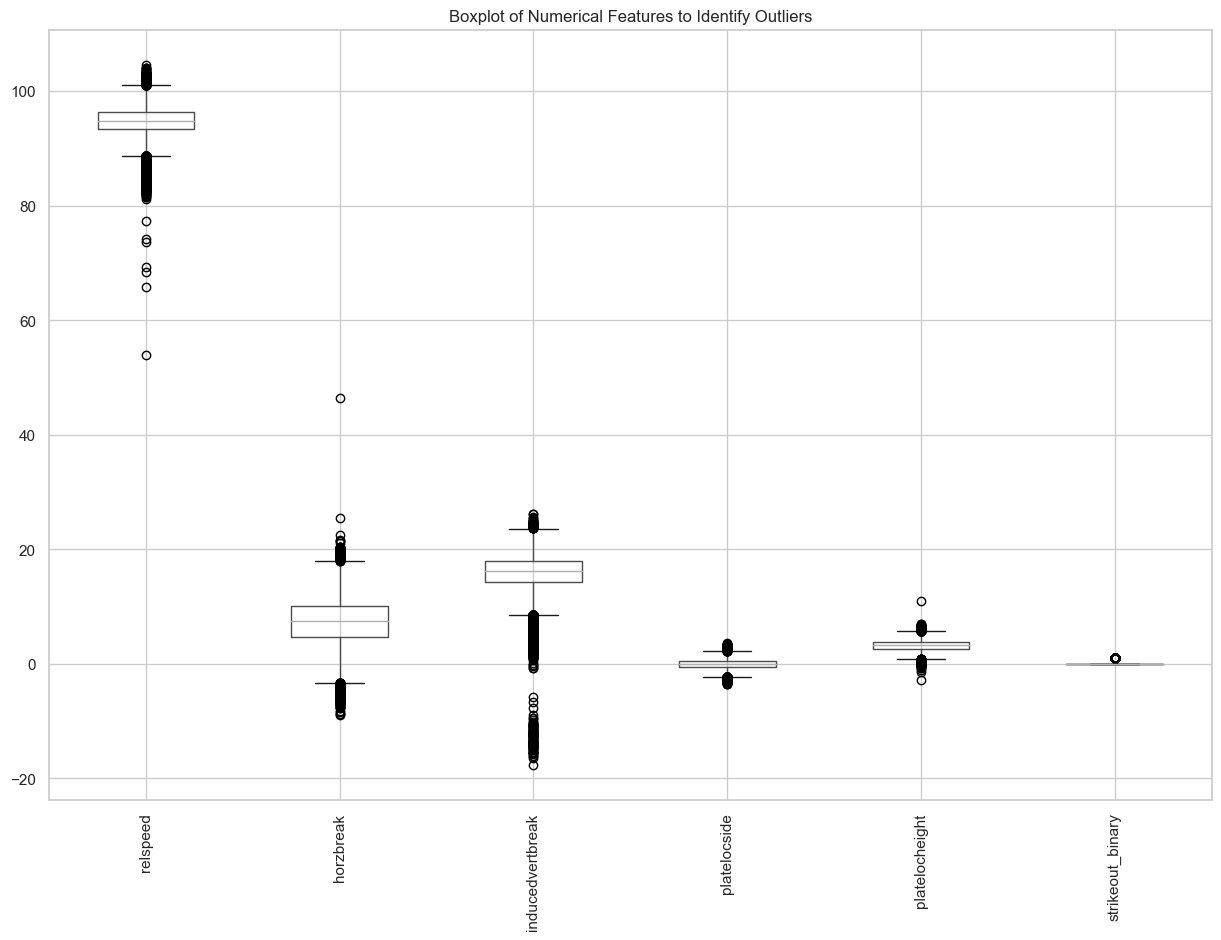

In [147]:
# Select numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns
numerical_data = data[numerical_features]
numerical_data = data[[col for col in numerical_features if col != 'spinrate']]

# Plot boxplots for numerical features to visualize outliers
plt.figure(figsize=(15, 10))
numerical_data.boxplot(rot=90)
plt.title('Boxplot of Numerical Features to Identify Outliers')
plt.show()

In [148]:
# numerical_data = data[numerical_features]
# 
# # Function to remove outliers using the IQR method
# def remove_outliers_iqr(data, columns, threshold=100):
#     cleaned_data = data.copy()
#     for column in columns:
#         Q1 = cleaned_data[column].quantile(0.25)
#         Q3 = cleaned_data[column].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - threshold * IQR
#         upper_bound = Q3 + threshold * IQR
#         # Remove rows with outliers
#         cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
#     return cleaned_data
# 
# # Remove outliers from the numerical features
# cleaned_data = remove_outliers_iqr(numerical_data, numerical_features)
# 
# # Display the shape of the dataset before and after removing outliers
# original_shape = numerical_data.shape
# cleaned_shape = cleaned_data.shape
# 
# original_shape, cleaned_shape

In [149]:
# Function to remove outliers using the IQR method for a given dataset
def remove_outliers_iqr_classwise(data, columns, threshold=1.5):
    cleaned_data = data.copy()
    for column in columns:
        Q1 = cleaned_data[column].quantile(0.25)
        Q3 = cleaned_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        # Remove rows with outliers
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
    return cleaned_data

# Separate the data into classes
strikeout_data = data[data['strikeout_binary'] == 1]
non_strikeout_data = data[data['strikeout_binary'] == 0]

# Remove outliers separately for each class
strikeout_data_cleaned = remove_outliers_iqr_classwise(strikeout_data, numerical_features)
non_strikeout_data_cleaned = remove_outliers_iqr_classwise(non_strikeout_data, numerical_features)

# Concatenate the cleaned data from both classes
cleaned_data_classwise = pd.concat([strikeout_data_cleaned, non_strikeout_data_cleaned])

# Check the distribution of the target variable in the cleaned dataset
strikeout_distribution_classwise = cleaned_data_classwise['strikeout_binary'].value_counts()
strikeout_distribution_classwise


strikeout_binary
0    52146
1    13350
Name: count, dtype: int64

### Looking @ histograms of features in nonstrike/strike scenarios:
- I don't think spinrate, release speed, or horz break on their own have meaningful differences
- I'm going to try combining vertical break & release speed 
- I think platelocside and platelocheight are going to be the most important 


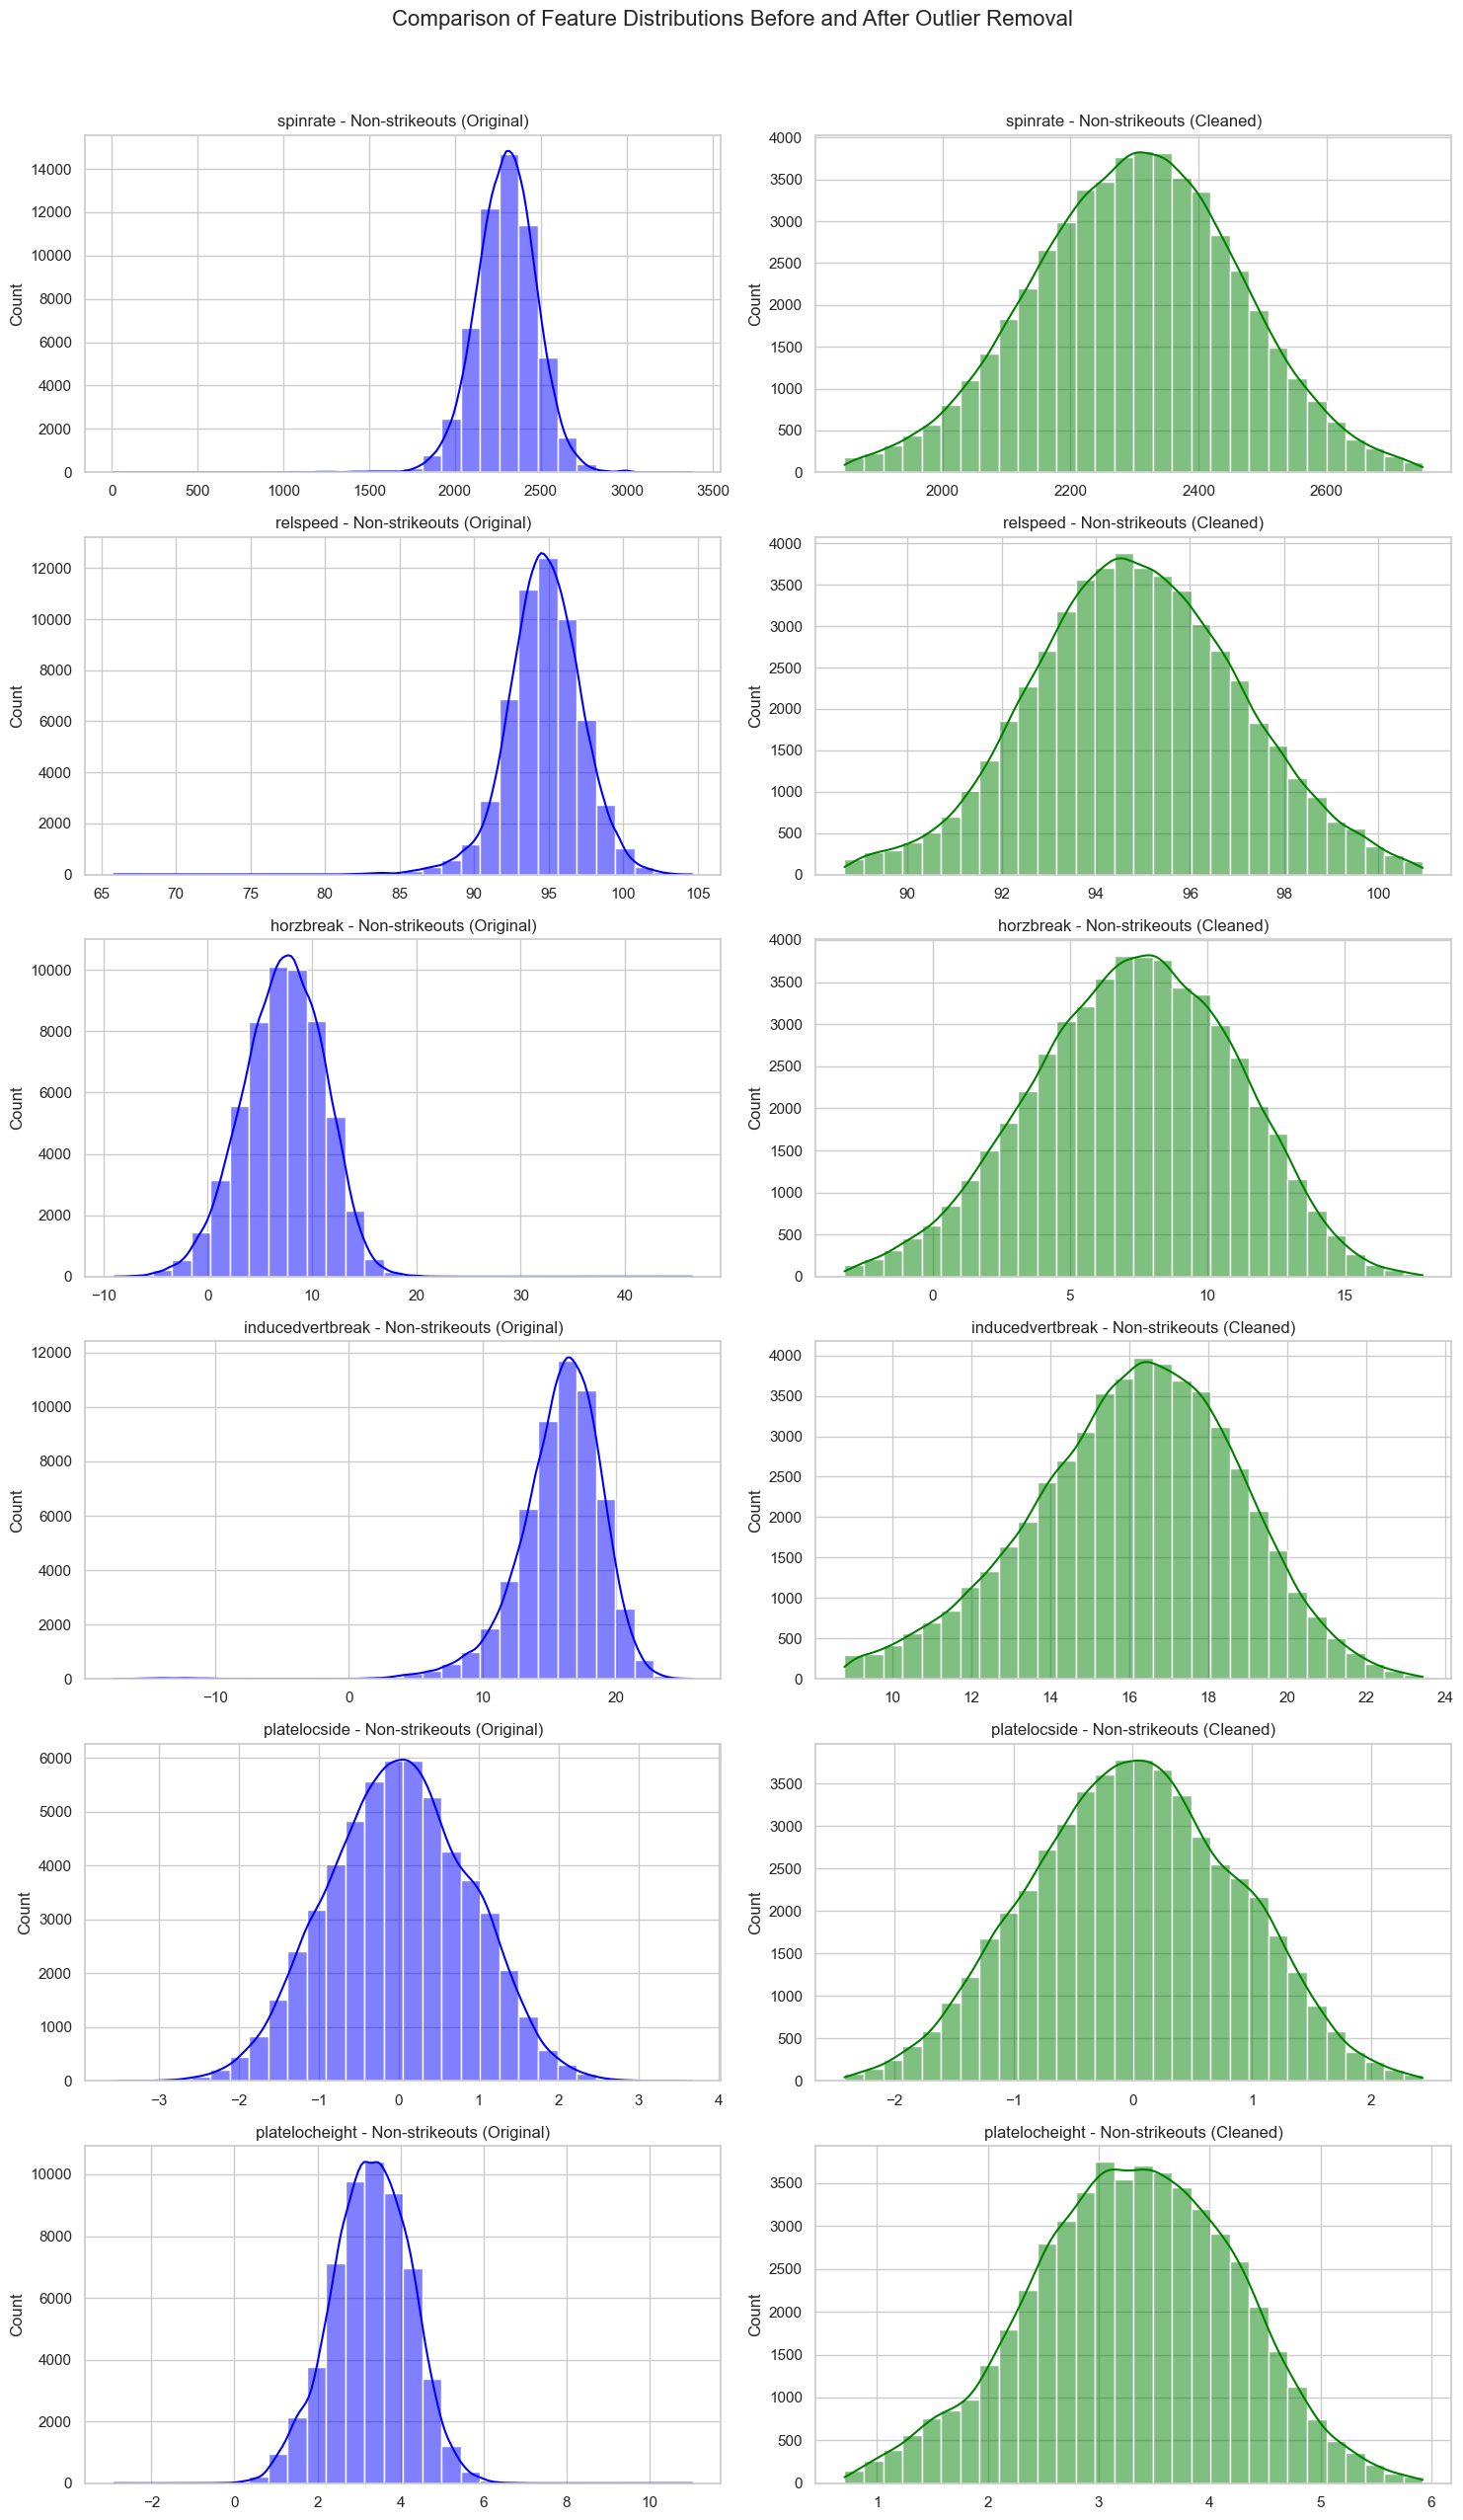

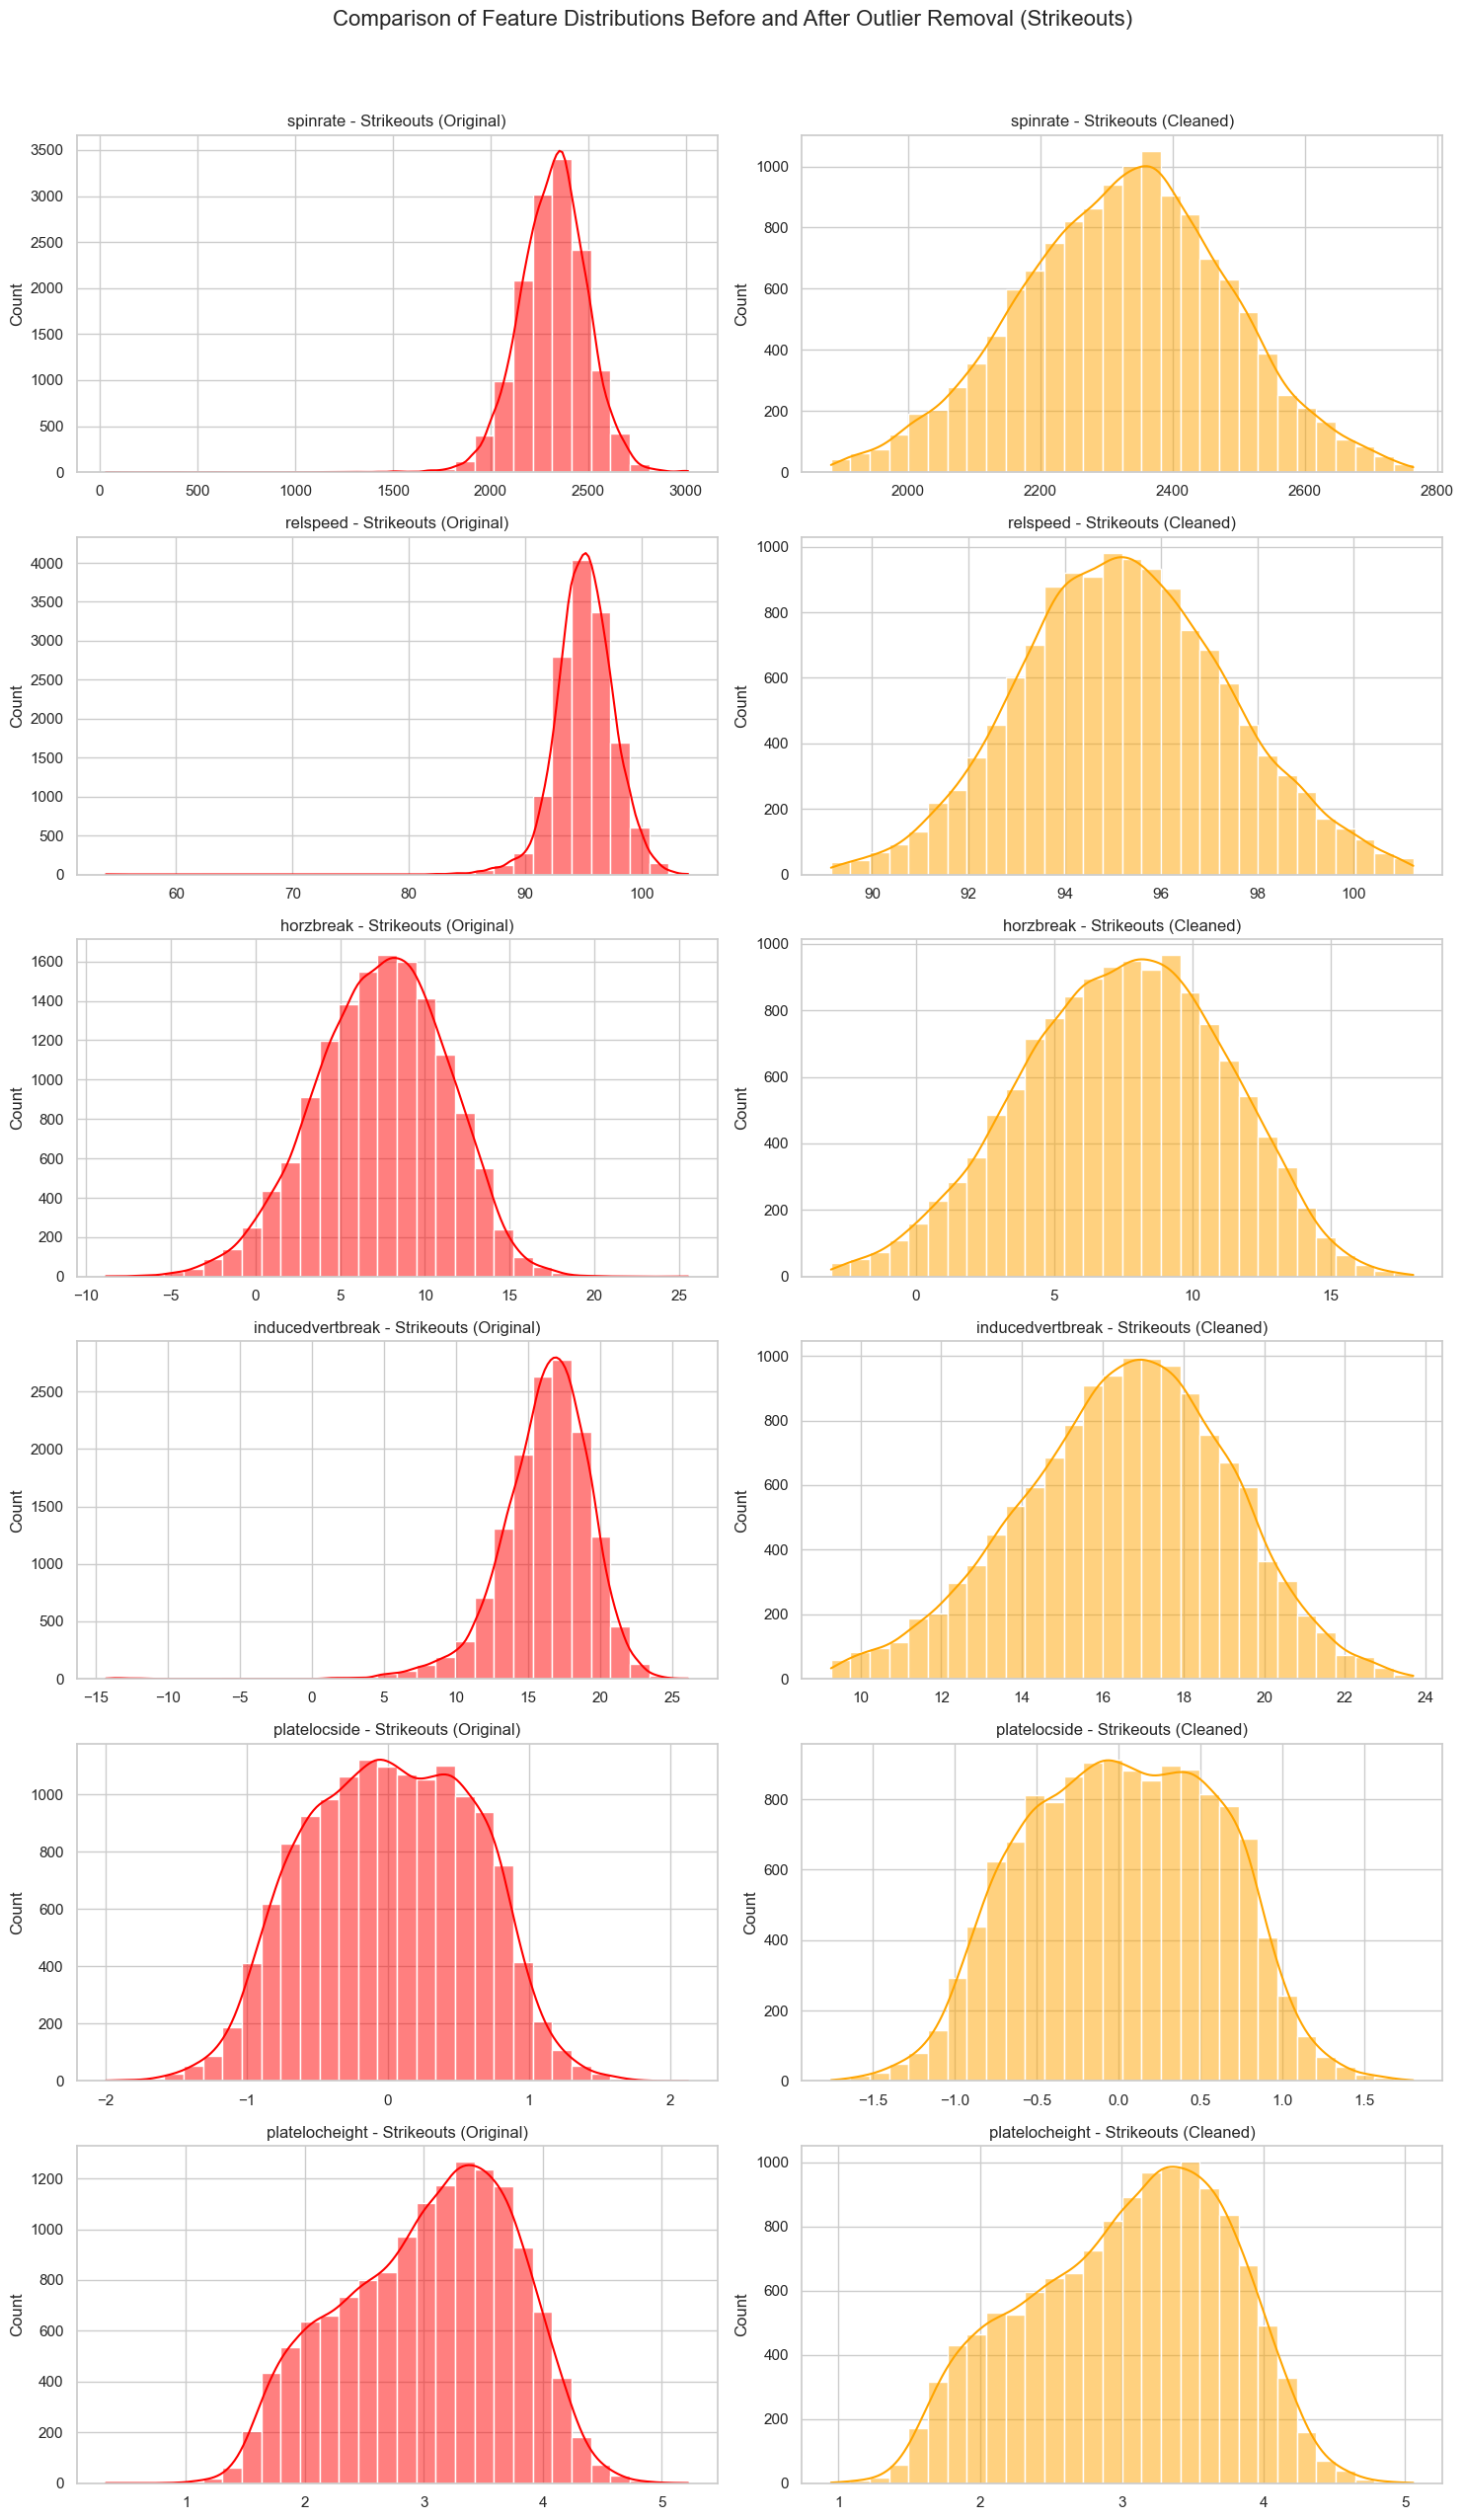

In [150]:
# Plot histograms of numerical features before and after outlier removal for non-strikeouts and strikeouts

# Original strikeout and non-strikeout data
original_strikeout_data = data[data['strikeout_binary'] == 1]
original_non_strikeout_data = data[data['strikeout_binary'] == 0]

# Features to visualize
features_to_visualize = ['spinrate', 'relspeed', 'horzbreak', 'inducedvertbreak', 'platelocside', 'platelocheight']

# Plot before and after for each feature
fig, axes = plt.subplots(len(features_to_visualize), 2, figsize=(15, 25))
fig.suptitle('Comparison of Feature Distributions Before and After Outlier Removal', fontsize=16, y=1.02)

for i, feature in enumerate(features_to_visualize):
    # Original data (non-strikeouts)
    sns.histplot(original_non_strikeout_data[feature], bins=30, kde=True, color='blue', ax=axes[i, 0])
    axes[i, 0].set_title(f'{feature} - Non-strikeouts (Original)')
    axes[i, 0].set_xlabel('')

    # Cleaned data (non-strikeouts)
    sns.histplot(non_strikeout_data_cleaned[feature], bins=30, kde=True, color='green', ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} - Non-strikeouts (Cleaned)')
    axes[i, 1].set_xlabel('')

plt.tight_layout()
plt.show()

# Plot for strikeouts
fig, axes = plt.subplots(len(features_to_visualize), 2, figsize=(15, 25))
fig.suptitle('Comparison of Feature Distributions Before and After Outlier Removal (Strikeouts)', fontsize=16, y=1.02)

for i, feature in enumerate(features_to_visualize):
    # Original data (strikeouts)
    sns.histplot(original_strikeout_data[feature], bins=30, kde=True, color='red', ax=axes[i, 0])
    axes[i, 0].set_title(f'{feature} - Strikeouts (Original)')
    axes[i, 0].set_xlabel('')

    # Cleaned data (strikeouts)
    sns.histplot(strikeout_data_cleaned[feature], bins=30, kde=True, color='orange', ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} - Strikeouts (Cleaned)')
    axes[i, 1].set_xlabel('')

plt.tight_layout()
plt.show()


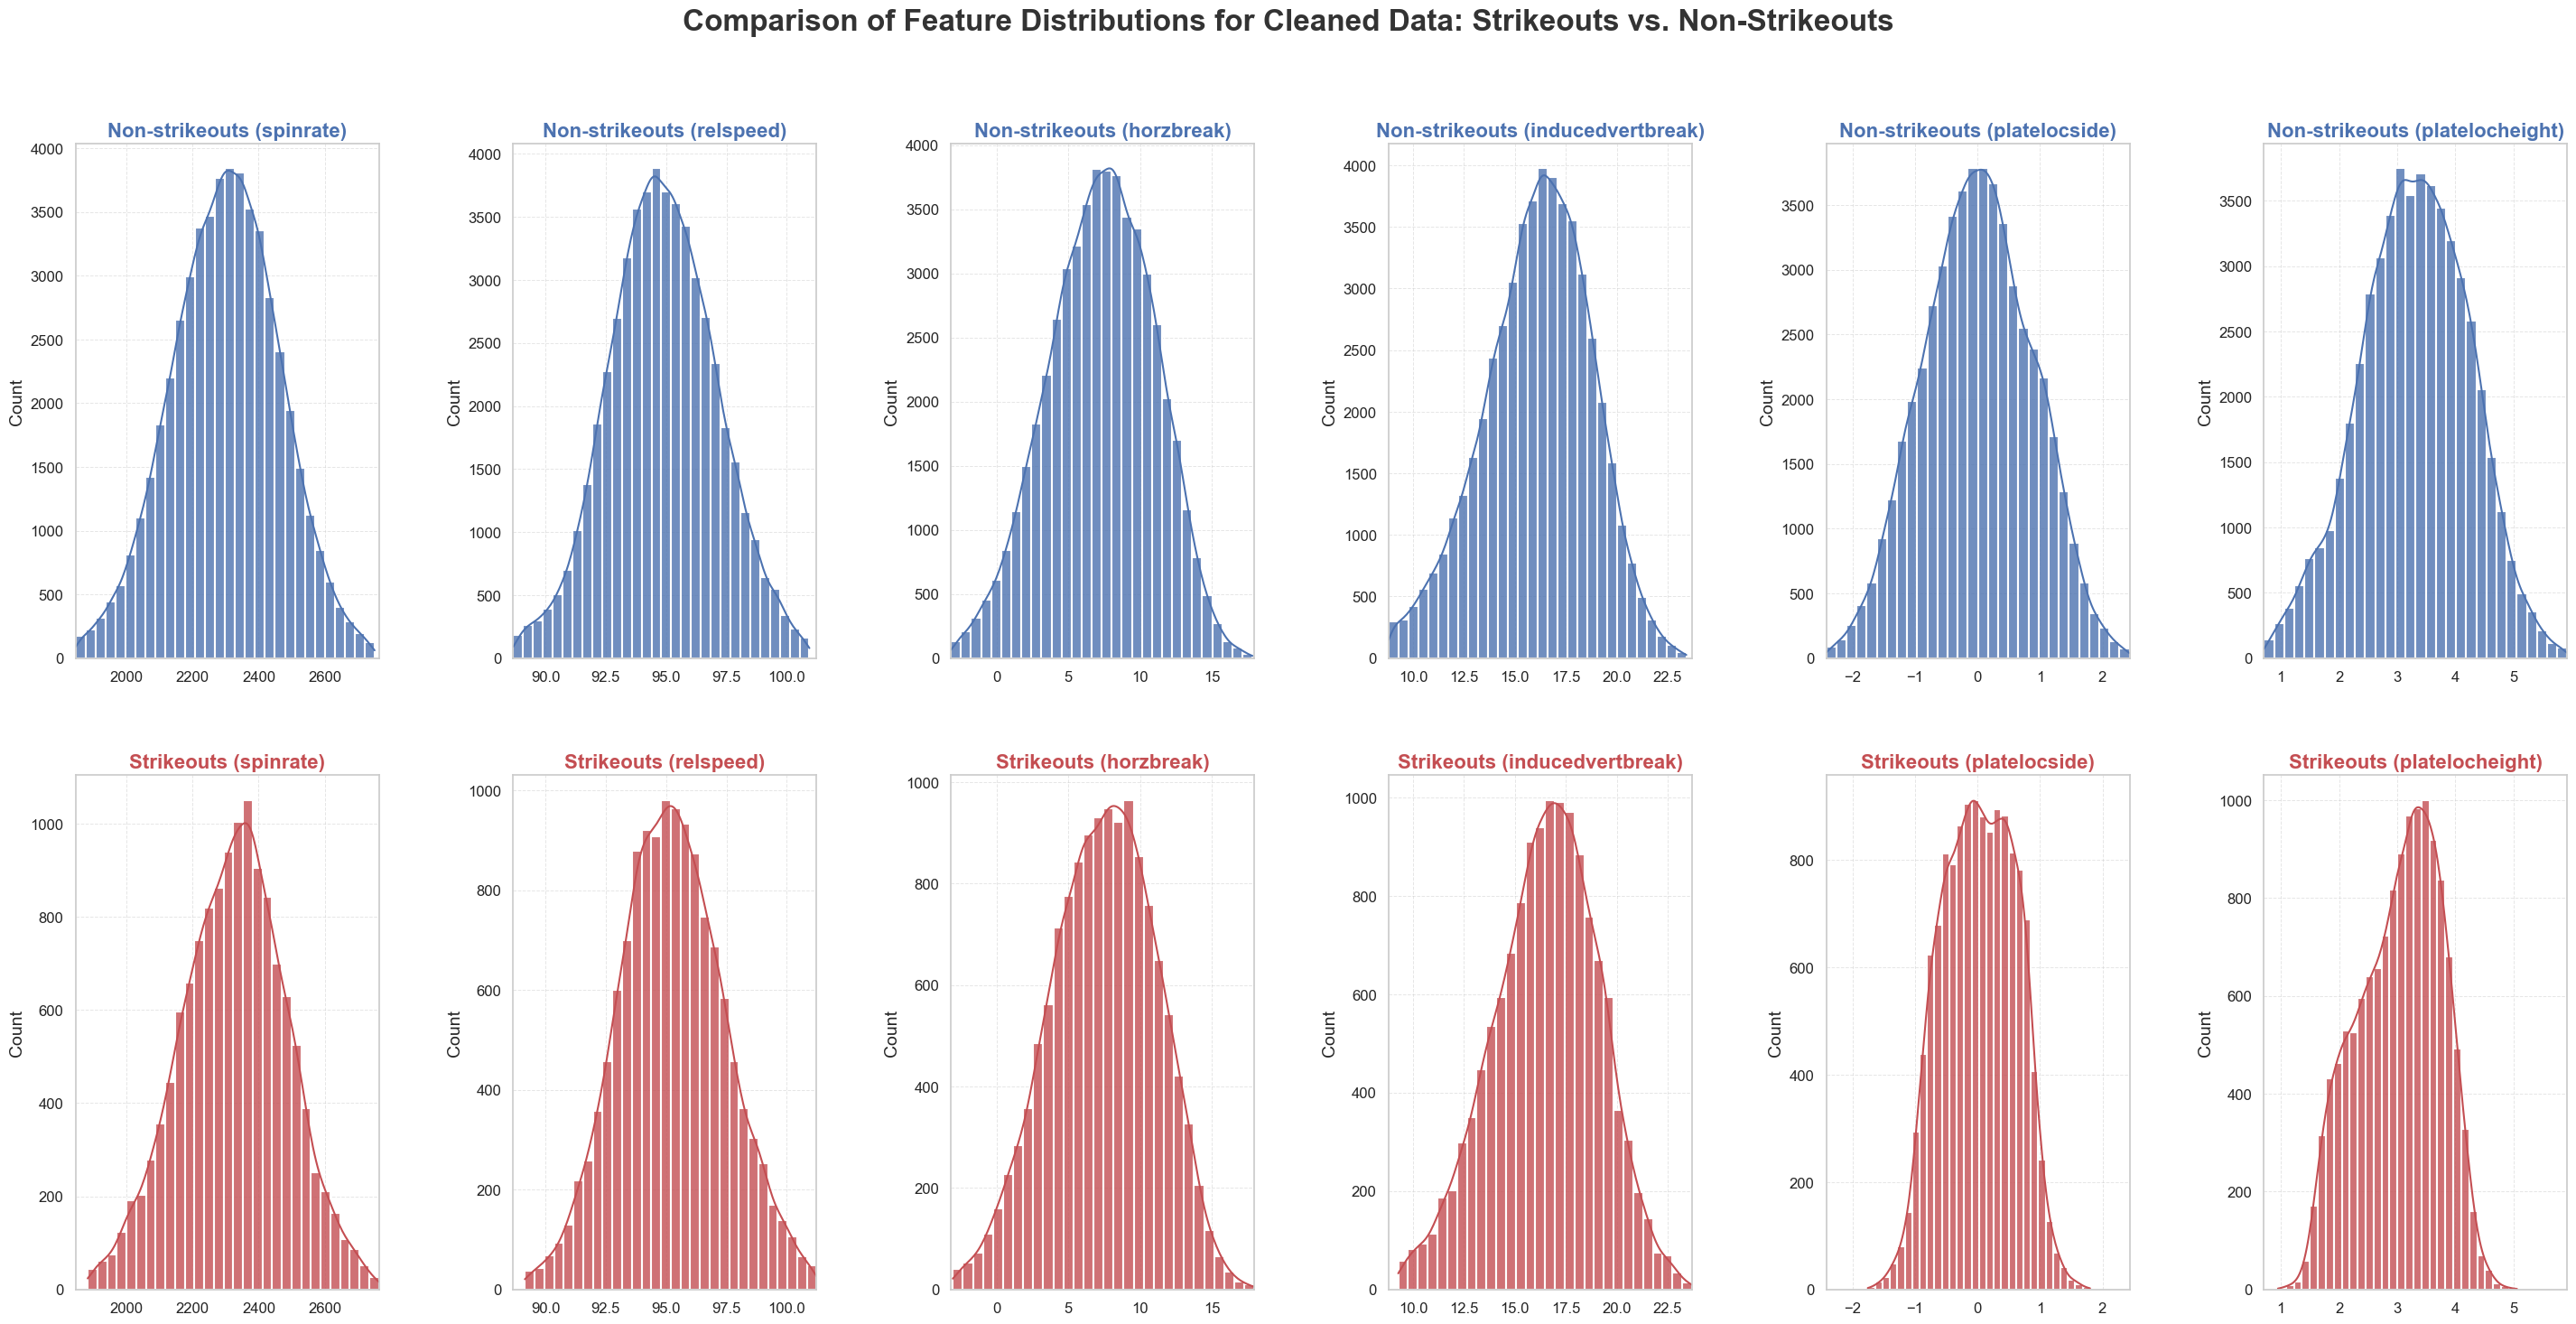

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style for consistency and aesthetics
sns.set(style="whitegrid")

# Define a color palette for strikeouts and non-strikeouts
colors = {"non_strikeouts": "#4C72B0", "strikeouts": "#C44E52"}

# Plot cleaned data for each feature (horizontal layout with larger plots and enhancements)
fig, axes = plt.subplots(2, len(features_to_visualize), figsize=(30, 15))
fig.suptitle('Comparison of Feature Distributions for Cleaned Data: Strikeouts vs. Non-Strikeouts', fontsize=24, y=1.02, weight='bold', color='#333333')

for i, feature in enumerate(features_to_visualize):
    # Determine the x-axis limits based on combined data for consistency
    x_min = min(non_strikeout_data_cleaned[feature].min(), strikeout_data_cleaned[feature].min())
    x_max = max(non_strikeout_data_cleaned[feature].max(), strikeout_data_cleaned[feature].max())

    # Cleaned data (non-strikeouts)
    sns.histplot(non_strikeout_data_cleaned[feature], bins=30, kde=True, color=colors["non_strikeouts"], 
                 ax=axes[0, i], linewidth=1.5, alpha=0.8)
    axes[0, i].set_title(f'Non-strikeouts ({feature})', fontsize=16, color='#4C72B0', weight='bold')
    axes[0, i].set_xlabel('')
    axes[0, i].set_ylabel('Count', fontsize=14)
    axes[0, i].set_xlim(x_min, x_max)
    axes[0, i].tick_params(axis='both', labelsize=12)
    axes[0, i].grid(True, linestyle='--', linewidth=0.7, alpha=0.5)

    # Cleaned data (strikeouts)
    sns.histplot(strikeout_data_cleaned[feature], bins=30, kde=True, color=colors["strikeouts"], 
                 ax=axes[1, i], linewidth=1.5, alpha=0.8)
    axes[1, i].set_title(f'Strikeouts ({feature})', fontsize=16, color='#C44E52', weight='bold')
    axes[1, i].set_xlabel('')
    axes[1, i].set_ylabel('Count', fontsize=14)
    axes[1, i].set_xlim(x_min, x_max)
    axes[1, i].tick_params(axis='both', labelsize=12)
    axes[1, i].grid(True, linestyle='--', linewidth=0.7, alpha=0.5)

# Adjust the layout to give more space between plots
plt.tight_layout(pad=5.0, w_pad=4.5, h_pad=4.0)
plt.subplots_adjust(top=0.92)
plt.show()


## Plotly Plot!

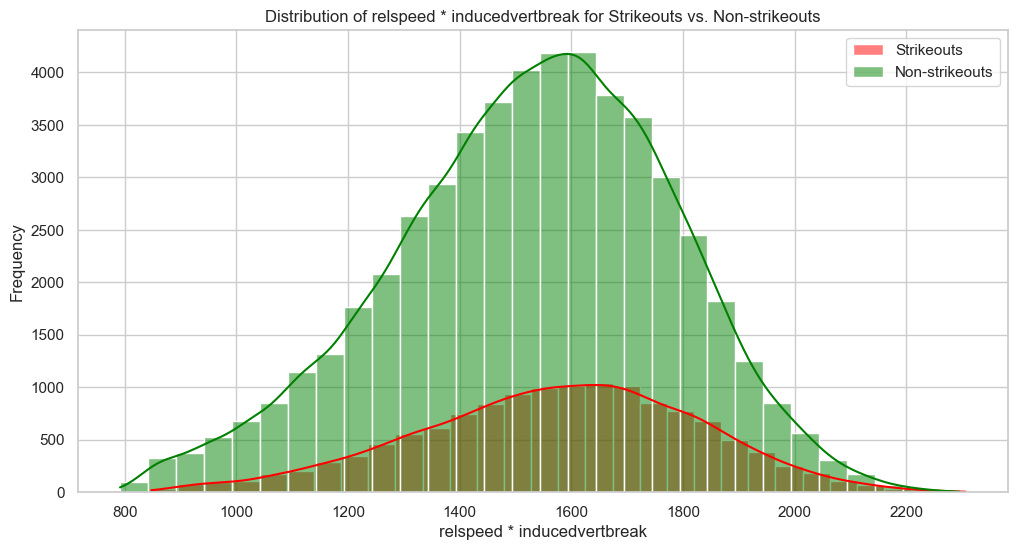

In [152]:
# Create a new variable that is relspeed and inducedvertbreak multiplied together
cleaned_data_classwise['relspeed_inducedvertbreak'] = cleaned_data_classwise['relspeed'] * cleaned_data_classwise['inducedvertbreak']

# Separate data into strikeouts and non-strikeouts
strikeout_data = cleaned_data_classwise[cleaned_data_classwise['strikeout_binary'] == 1]
non_strikeout_data = cleaned_data_classwise[cleaned_data_classwise['strikeout_binary'] == 0]

# Plot the distribution of the new variable for strikeouts and non-strikeouts
plt.figure(figsize=(12, 6))
sns.histplot(strikeout_data['relspeed_inducedvertbreak'], bins=30, kde=True, color='red', label='Strikeouts')
sns.histplot(non_strikeout_data['relspeed_inducedvertbreak'], bins=30, kde=True, color='green', label='Non-strikeouts')
plt.title('Distribution of relspeed * inducedvertbreak for Strikeouts vs. Non-strikeouts')
plt.xlabel('relspeed * inducedvertbreak')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [153]:
non_strikeout_data['eventtype'].unique()

array(['ball', 'single', 'foul', 'force_out', 'hit_by_pitch', 'home_run',
       'sac_fly', 'double', 'triple', 'sac_bunt', 'fielders_choice_out',
       'fielders_choice', 'swinging_strike', 'sac_fly_double_play'],
      dtype=object)

In [154]:
feature_columns = [
        'spinrate', 'relspeed', 'horzbreak', 'inducedvertbreak', 
        'platelocside', 'platelocheight', 'relspeed_inducedvertbreak'
    ]
cleaned_data_classwise[feature_columns].corr()

,spinrate,relspeed,horzbreak,inducedvertbreak,platelocside,platelocheight,relspeed_inducedvertbreak
spinrate,1.000000,0.223625,-0.072010,0.230456,0.042887,-0.076036,0.260628
relspeed,0.223625,1.000000,0.138862,0.034997,0.042478,-0.132915,0.175576
horzbreak,-0.072010,0.138862,1.000000,-0.158779,-0.110447,-0.070301,-0.138615
inducedvertbreak,0.230456,0.034997,-0.158779,1.000000,0.029639,0.012031,0.989724
platelocside,0.042887,0.042478,-0.110447,0.029639,1.000000,-0.271808,0.035294
platelocheight,-0.076036,-0.132915,-0.070301,0.012031,-0.271808,1.000000,-0.007227
relspeed_inducedvertbreak,0.260628,0.175576,-0.138615,0.989724,0.035294,-0.007227,1.000000


### If I want to keep just the interaction term:

In [155]:
# Count the appearances for each pitcher and filter out those with fewer than 50 appearances
pitcher_appearances = cleaned_data_classwise['pitcher'].value_counts()
pitchers_with_100_plus_appearances = pitcher_appearances[pitcher_appearances >= 100].index

# Filter the dataframe to include only pitchers with 50 or more appearances
cleaned_data_classwise = cleaned_data_classwise[cleaned_data_classwise['pitcher'].isin(pitchers_with_100_plus_appearances)]

cleaned_data_classwise

,pitcher,pitchname,pitchresult,eventtype,spinrate,relspeed,horzbreak,inducedvertbreak,platelocside,platelocheight,strikeout_binary,relspeed_inducedvertbreak
25,"Gallen, Zac",FF,C,strikeout,2502.240234,94.112892,2.462363,18.226583,0.433979,2.300865,1,1715.356485
40,"Gray, Jon",FF,C,strikeout,2257.527588,96.098084,9.364018,18.195126,-0.346139,1.675238,1,1748.516697
94,"Giolito, Lucas",FF,S,strikeout,2442.560303,93.514725,5.891717,17.998758,-0.187572,3.245606,1,1683.148930
103,"Giolito, Lucas",FF,C,strikeout,2338.321289,94.639954,11.088030,17.145796,0.667325,3.362605,1,1622.677321
128,"Cisnero, Jose",FF,S,strikeout,2312.854248,97.639137,12.269574,11.875773,-0.608685,3.070679,1,1159.540272
...,...,...,...,...,...,...,...,...,...,...,...,...
187396,"Greinke, Zack",FF,F,foul,2292.262451,90.186073,2.907715,17.270081,-0.060285,3.277781,0,1557.520752
187398,"Alcantara, Sandy",FF,E,home_run,2341.313232,99.597092,13.290255,14.944304,-0.707683,3.001816,0,1488.409262
187402,"Pfaadt, Brandon",FF,D,single,2501.821533,94.116440,3.854095,14.275191,0.586442,1.884596,0,1343.530184
187403,"Gallegos, Giovanny",FF,B,ball,2398.320557,93.521347,10.798670,14.733393,-0.807034,4.470551,0,1377.886734


## Ranking

In [156]:
# Calculate the number of 'strikeout' and 'ball' events for each pitcher
strike_counts = cleaned_data_classwise[cleaned_data_classwise['eventtype'] == 'strikeout'].groupby('pitcher').size()
ball_counts = cleaned_data_classwise[cleaned_data_classwise['eventtype'] == 'ball'].groupby('pitcher').size()

# Combine these counts into a single DataFrame
pitcher_stats = pd.DataFrame({'strikeouts': strike_counts, 'balls': ball_counts}).fillna(0)

pitcher_stats = pitcher_stats[pitcher_stats['balls'] > 0]

# Calculate the strike-to-ball ratio
pitcher_stats['strike_percentage'] = pitcher_stats['strikeouts'] / (pitcher_stats['balls'] + pitcher_stats['strikeouts'])

# Get the top 10 pitchers by strike-to-ball ratio
top_10_pitchers = pitcher_stats.sort_values(by='strike_percentage', ascending=False).head(10)

# Display the result
top_10_pitchers[['strike_percentage']]

,strike_percentage
pitcher,
"deGrom, Jacob",0.573770
"Fairbanks, Peter",0.522936
"Gausman, Kevin",0.516014
"Wick, Rowan",0.500000
"Neris, Hector",0.491667
"Crawford, Kutter",0.479675
"Vest, Will",0.477273
"Iglesias, Raisel",0.471154
"Sewald, Paul",0.468354


In [157]:
# Get the top 10 pitchers by strike-to-ball ratio
bottom_10_pitchers = pitcher_stats.sort_values(by='strike_percentage', ascending=True).head(10)

# Display the result
bottom_10_pitchers[['strike_percentage']]

,strike_percentage
pitcher,
"Gibson, Kyle",0.108434
"Blackburn, Paul",0.134831
"DeSclafani, Anthony",0.145833
"Espino, Paolo",0.148148
"Heasley, Jon",0.155844
"Civale, Aaron",0.155963
"Plesac, Zach",0.157025
"Gray, Josiah",0.166667
"Senzatela, Antonio",0.168142


In [158]:
# # Add the new variable to the DataFrame
# # cleaned_data_classwise['VelocityBreakProduct'] = cleaned_data_classwise['relspeed'] * cleaned_data_classwise['inducedvertbreak']
# 
# # Remove the original 'relspeed' and 'inducedvertbreak' columns
# cleaned_data_classwise = cleaned_data_classwise.drop(columns=['relspeed', 'inducedvertbreak'])
# 
# # Display the first few rows of the updated DataFrame to confirm the changes
cleaned_data_classwise.head()
cleaned_data_classwise.to_csv('baseball_stuff.csv', index=False)

### More feature engineering: Making a new col 
- this col averages each pitcher's average velocity and takes into acc on a pitch by pitch basis, how much the velo differs from the pitcher's regular speed

In [159]:
# Calculate the pitcher's average release speed
cleaned_data_classwise['average_relspeed'] = cleaned_data_classwise.groupby('pitcher')['relspeed'].transform('mean')

# Calculate the difference between each pitch's release speed and the pitcher's average release speed
cleaned_data_classwise['relspeed_diff'] = cleaned_data_classwise['relspeed'] - cleaned_data_classwise['average_relspeed']

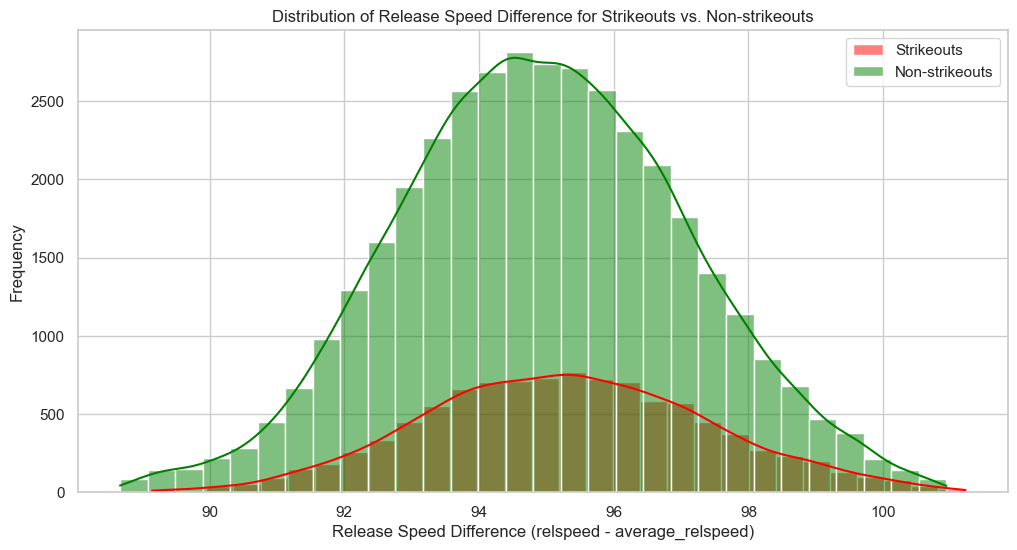

In [160]:
# Separate data into strikeouts and non-strikeouts
strikeout_data = cleaned_data_classwise[cleaned_data_classwise['strikeout_binary'] == 1]
non_strikeout_data = cleaned_data_classwise[cleaned_data_classwise['strikeout_binary'] == 0]
# Plot the distribution of the new variable for strikeouts and non-strikeouts
plt.figure(figsize=(12, 6))
sns.histplot(strikeout_data['relspeed'], bins=30, kde=True, color='red', label='Strikeouts')
sns.histplot(non_strikeout_data['relspeed'], bins=30, kde=True, color='green', label='Non-strikeouts')
plt.title('Distribution of Release Speed Difference for Strikeouts vs. Non-strikeouts')
plt.xlabel('Release Speed Difference (relspeed - average_relspeed)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [161]:
cleaned_data_classwise

,pitcher,pitchname,pitchresult,eventtype,spinrate,relspeed,horzbreak,inducedvertbreak,platelocside,platelocheight,strikeout_binary,relspeed_inducedvertbreak,average_relspeed,relspeed_diff
25,"Gallen, Zac",FF,C,strikeout,2502.240234,94.112892,2.462363,18.226583,0.433979,2.300865,1,1715.356485,93.764296,0.348596
40,"Gray, Jon",FF,C,strikeout,2257.527588,96.098084,9.364018,18.195126,-0.346139,1.675238,1,1748.516697,96.044196,0.053887
94,"Giolito, Lucas",FF,S,strikeout,2442.560303,93.514725,5.891717,17.998758,-0.187572,3.245606,1,1683.148930,93.607192,-0.092467
103,"Giolito, Lucas",FF,C,strikeout,2338.321289,94.639954,11.088030,17.145796,0.667325,3.362605,1,1622.677321,93.607192,1.032761
128,"Cisnero, Jose",FF,S,strikeout,2312.854248,97.639137,12.269574,11.875773,-0.608685,3.070679,1,1159.540272,96.678168,0.960969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187396,"Greinke, Zack",FF,F,foul,2292.262451,90.186073,2.907715,17.270081,-0.060285,3.277781,0,1557.520752,90.255619,-0.069546
187398,"Alcantara, Sandy",FF,E,home_run,2341.313232,99.597092,13.290255,14.944304,-0.707683,3.001816,0,1488.409262,98.663455,0.933636
187402,"Pfaadt, Brandon",FF,D,single,2501.821533,94.116440,3.854095,14.275191,0.586442,1.884596,0,1343.530184,94.253497,-0.137057
187403,"Gallegos, Giovanny",FF,B,ball,2398.320557,93.521347,10.798670,14.733393,-0.807034,4.470551,0,1377.886734,94.253438,-0.732091


## Logistic Regression

In [162]:
# Simplify pitchresult into broader categories
def categorize_pitchresult(pitchresult):
    if pitchresult in ['S', 'C']:  # Likely strike-related
        return 'strike_related'
    elif pitchresult in ['X', 'D', 'T', 'O']:  # In-play outcomes
        return 'in_play'
    elif pitchresult in ['B', 'W']:  # Balls and walks
        return 'ball_related'
    elif pitchresult == 'F':  # Foul
        return 'foul'
    else:  # Other miscellaneous outcomes
        return 'other'

# Apply categorization
cleaned_data_classwise['pitchresult_category'] = cleaned_data_classwise['pitchresult'].apply(categorize_pitchresult)

# One-hot encode the new categorical columns for logistic regression
data_encoded = pd.get_dummies(cleaned_data_classwise, columns=['pitchresult_category'], drop_first=True)

# Define the new feature set including the encoded pitchresult categories and original features
feature_columns = [
        'spinrate', 'average_relspeed', 'relspeed_diff', 'horzbreak', 'inducedvertbreak', 
        'platelocside', 'platelocheight', 'relspeed_inducedvertbreak'
    ] # + [col for col in data_encoded.columns if 'pitchresult_category_' in col]

# Separate features and target
X = data_encoded[feature_columns]
y = data_encoded['strikeout_binary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model with class weights to handle imbalance
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

accuracy, precision, recall, roc_auc

(0.5719562338838944,
 0.2660508083140878,
 0.5568804382855301,
 0.6085820237069002)

### OverSampling

In [163]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = cleaned_data_classwise[[
        'spinrate', 'average_relspeed', 'relspeed_diff', 'horzbreak', 'inducedvertbreak', 
        'platelocside', 'platelocheight', 'relspeed_inducedvertbreak'
    ]]
y = cleaned_data_classwise['strikeout_binary']  # assuming you have a column that indicates if the outcome was a strikeout (0 or 1)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train logistic regression model with class weights to handle imbalance
log_reg = LogisticRegression(max_iter=1000,  class_weight={0: 1, 1: 0.94})
# log_reg = LogisticRegression(max_iter=1000,  class_weight="balanced")

log_reg.fit(X_resampled, y_resampled)

# Make predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

accuracy, precision, recall, roc_auc

(0.5993978422681274,
 0.27034944549068846,
 0.4978805394990366,
 0.6099196151868806)

In [164]:
# X_train

### Looking at the Coefficients

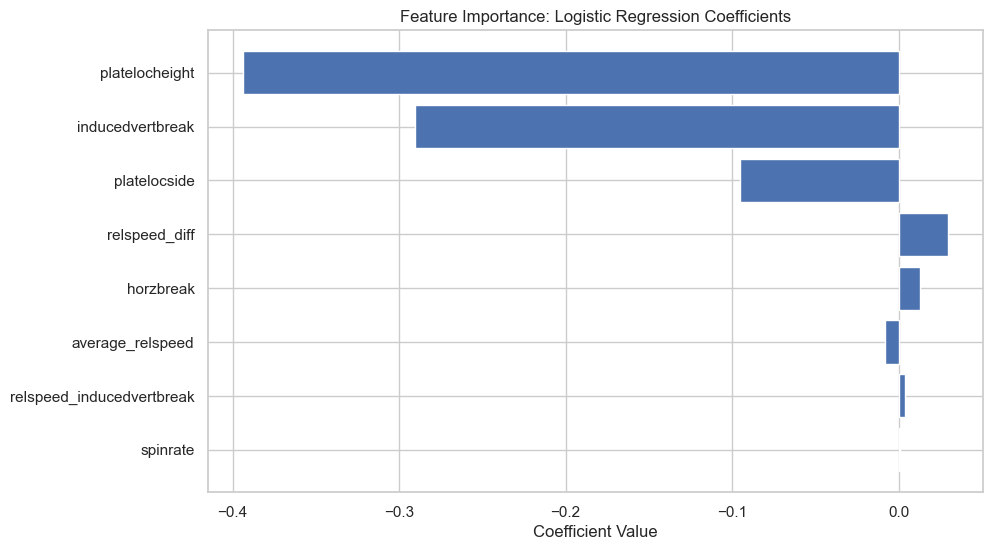

,Feature,Coefficient
6,platelocheight,-0.393674
4,inducedvertbreak,-0.290340
5,platelocside,-0.095489
2,relspeed_diff,0.029281
3,horzbreak,0.012440
1,average_relspeed,-0.008158
7,relspeed_inducedvertbreak,0.003644
0,spinrate,0.000414


In [165]:
# Get the feature names and coefficients
feature_names = X_train.columns
coefficients = log_reg.coef_[0]

# Create a DataFrame for easier interpretation
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Plot the coefficients for visual clarity
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance: Logistic Regression Coefficients')
plt.gca().invert_yaxis()
plt.show()

feature_importance

## Random Forest with NOTHING done

In [166]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model
accuracy_rf_og = accuracy_score(y_test, y_pred_rf)
precision_rf_og = precision_score(y_test, y_pred_rf)
recall_rf_og = recall_score(y_test, y_pred_rf)
roc_auc_rf_og = roc_auc_score(y_test, y_pred_rf_proba)

accuracy_rf_og, precision_rf_og, recall_rf_og, roc_auc_rf_og

(0.7823032533244125,
 0.4876543209876543,
 0.06088631984585742,
 0.7089289749608861)

In [167]:
metrics_rf_og = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'ROC AUC'],
    'Value': [accuracy_rf_og, precision_rf_og, recall_rf_og, roc_auc_rf_og]
}

# Convert dictionary to a DataFrame
accuracy_metrics_rf_df_og  = pd.DataFrame(metrics_rf_og)

accuracy_metrics_rf_df_og

,Metric,Value
0,Accuracy,0.782303
1,Precision,0.487654
2,Recall,0.060886
3,ROC AUC,0.708929


## Random Forest

In [168]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model with class weights to handle imbalance
rf_model = RandomForestClassifier(n_estimators=100, class_weight={0: 1, 1: 2}, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)

accuracy_rf, precision_rf, recall_rf, roc_auc_rf

(0.7827214184159906,
 0.4939271255060729,
 0.047013487475915224,
 0.7104166435131732)

In [169]:
metrics_rf_1 = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'ROC AUC'],
    'Value': [accuracy_rf, precision_rf, recall_rf, roc_auc_rf]
}

# Convert dictionary to a DataFrame
accuracy_metrics_rf_df_1  = pd.DataFrame(metrics_rf_1)

accuracy_metrics_rf_df_1

,Metric,Value
0,Accuracy,0.782721
1,Precision,0.493927
2,Recall,0.047013
3,ROC AUC,0.710417


In [170]:
# from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE
# 
# # Load the data
# # df = pd.read_csv(file_path)
# 
# # Simplify pitchresult into broader categories
# df['pitchresult_category'] = df['pitchresult'].apply(categorize_pitchresult)
# 
# # One-hot encode the new categorical columns for logistic regression
# data_encoded = pd.get_dummies(df, columns=['pitchresult_category'], drop_first=True)
# 
# # Define the new feature set including the encoded pitchresult categories and original features
# feature_columns = [
#     'spinrate', 'relspeed', 'horzbreak', 'inducedvertbreak', 
#     'platelocside', 'platelocheight'
# ] + [col for col in data_encoded.columns if 'pitchresult_category_' in col]
# 
# # Separate features and target
# X = data_encoded[feature_columns]
# y = data_encoded['strikeout_binary']
# 
# # Oversample the minority class using SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)
# 
# # Feature scaling
# scaler = StandardScaler()
# X_resampled_scaled = scaler.fit_transform(X_resampled)
# 
# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.3, random_state=42)
# 
# # Train Random Forest model with class weights to handle imbalance
# rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
# rf_model.fit(X_train, y_train)
# 
# # Make predictions
# y_pred_rf = rf_model.predict(X_test)
# y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]
# 
# # Evaluate the Random Forest model
# accuracy_rf = accuracy_score(y_test, y_pred_rf)
# precision_rf = precision_score(y_test, y_pred_rf, zero_division=1)
# recall_rf = recall_score(y_test, y_pred_rf)
# roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)
# 
# accuracy_rf, precision_rf, recall_rf, roc_auc_rf

In [171]:
# X_train

In [172]:
# X_resampled

### DownSampling with RandomForest

In [173]:
# Define the new feature set excluding the encoded pitchresult categories to avoid data leakage
feature_columns = [
        'spinrate', 'average_relspeed', 'relspeed_diff', 'horzbreak', 'inducedvertbreak', 
        'platelocside', 'platelocheight',  'relspeed_inducedvertbreak'
    ]


# Separate features and target
X = data_encoded[feature_columns]
y = data_encoded['strikeout_binary']

# Concatenate features and target for resampling
data_resampled = pd.concat([X, y], axis=1)

# Separate majority and minority classes
strikeout = data_resampled[data_resampled['strikeout_binary'] == 1]
non_strikeout = data_resampled[data_resampled['strikeout_binary'] == 0]

# Downsample majority class (non-strikeouts)
non_strikeout_downsampled = resample(non_strikeout, 
                                     replace=False,    # sample without replacement
                                     n_samples=len(strikeout),  # match minority class
                                     random_state=42)

# Combine minority class with downsampled majority class
data_balanced = pd.concat([strikeout, non_strikeout_downsampled])

# Separate features and target after resampling
X_balanced = data_balanced.drop('strikeout_binary', axis=1)
y_balanced = data_balanced['strikeout_binary']

# Feature scaling
scaler = StandardScaler()
X_balanced_scaled = scaler.fit_transform(X_balanced)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced_scaled, y_balanced, test_size=0.3, random_state=42)

# Train Random Forest model with class weights to handle imbalance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)

accuracy_rf, precision_rf, recall_rf, roc_auc_rf

(0.6621266819822776,
 0.6406206705458576,
 0.7521145087833442,
 0.7155410471073348)

In [174]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.69      0.57      0.63      3020
           1       0.64      0.75      0.69      3074

    accuracy                           0.66      6094
   macro avg       0.67      0.66      0.66      6094
weighted avg       0.67      0.66      0.66      6094



In [175]:
data_resampled

,spinrate,average_relspeed,relspeed_diff,horzbreak,inducedvertbreak,platelocside,platelocheight,relspeed_inducedvertbreak,strikeout_binary
25,2502.240234,93.764296,0.348596,2.462363,18.226583,0.433979,2.300865,1715.356485,1
40,2257.527588,96.044196,0.053887,9.364018,18.195126,-0.346139,1.675238,1748.516697,1
94,2442.560303,93.607192,-0.092467,5.891717,17.998758,-0.187572,3.245606,1683.148930,1
103,2338.321289,93.607192,1.032761,11.088030,17.145796,0.667325,3.362605,1622.677321,1
128,2312.854248,96.678168,0.960969,12.269574,11.875773,-0.608685,3.070679,1159.540272,1
...,...,...,...,...,...,...,...,...,...
187396,2292.262451,90.255619,-0.069546,2.907715,17.270081,-0.060285,3.277781,1557.520752,0
187398,2341.313232,98.663455,0.933636,13.290255,14.944304,-0.707683,3.001816,1488.409262,0
187402,2501.821533,94.253497,-0.137057,3.854095,14.275191,0.586442,1.884596,1343.530184,0
187403,2398.320557,94.253438,-0.732091,10.798670,14.733393,-0.807034,4.470551,1377.886734,0


In [176]:
# Interaction between spinrate and relspeed
data_encoded['spinrate_relspeed'] = data_encoded['spinrate'] * data_encoded['relspeed']

# Movement Ratio between horizontal and vertical break
data_encoded['movement_ratio'] = data_encoded['horzbreak'] / (data_encoded['inducedvertbreak'] + 1e-5)

# Normalize plate location to capture if the pitch is at the edge of the strike zone
data_encoded['is_edge_pitch'] = (
    (data_encoded['platelocside'].abs() > 0.7) |  # Assuming a threshold for edge pitches
    (data_encoded['platelocheight'] < 1.5) | 
    (data_encoded['platelocheight'] > 3.5)
).astype(int)

In [177]:
data_encoded

,pitcher,pitchname,pitchresult,eventtype,spinrate,relspeed,horzbreak,inducedvertbreak,platelocside,platelocheight,...,relspeed_inducedvertbreak,average_relspeed,relspeed_diff,pitchresult_category_foul,pitchresult_category_in_play,pitchresult_category_other,pitchresult_category_strike_related,spinrate_relspeed,movement_ratio,is_edge_pitch
25,"Gallen, Zac",FF,C,strikeout,2502.240234,94.112892,2.462363,18.226583,0.433979,2.300865,...,1715.356485,93.764296,0.348596,False,False,False,True,235493.065276,0.135097,0
40,"Gray, Jon",FF,C,strikeout,2257.527588,96.098084,9.364018,18.195126,-0.346139,1.675238,...,1748.516697,96.044196,0.053887,False,False,False,True,216944.074655,0.514644,0
94,"Giolito, Lucas",FF,S,strikeout,2442.560303,93.514725,5.891717,17.998758,-0.187572,3.245606,...,1683.148930,93.607192,-0.092467,False,False,False,True,228415.354371,0.327340,0
103,"Giolito, Lucas",FF,C,strikeout,2338.321289,94.639954,11.088030,17.145796,0.667325,3.362605,...,1622.677321,93.607192,1.032761,False,False,False,True,221298.618316,0.646691,0
128,"Cisnero, Jose",FF,S,strikeout,2312.854248,97.639137,12.269574,11.875773,-0.608685,3.070679,...,1159.540272,96.678168,0.960969,False,False,False,True,225825.093406,1.033159,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187396,"Greinke, Zack",FF,F,foul,2292.262451,90.186073,2.907715,17.270081,-0.060285,3.277781,...,1557.520752,90.255619,-0.069546,True,False,False,False,206730.149429,0.168367,0
187398,"Alcantara, Sandy",FF,E,home_run,2341.313232,99.597092,13.290255,14.944304,-0.707683,3.001816,...,1488.409262,98.663455,0.933636,False,False,True,False,233187.988596,0.889318,1
187402,"Pfaadt, Brandon",FF,D,single,2501.821533,94.116440,3.854095,14.275191,0.586442,1.884596,...,1343.530184,94.253497,-0.137057,False,True,False,False,235462.535751,0.269985,0
187403,"Gallegos, Giovanny",FF,B,ball,2398.320557,93.521347,10.798670,14.733393,-0.807034,4.470551,...,1377.886734,94.253438,-0.732091,False,False,False,False,224294.169148,0.732938,1


In [178]:
# Create new engineered features

# Interaction between spinrate and relspeed
data_encoded['spinrate_relspeed'] = data_encoded['spinrate'] * data_encoded['relspeed']

# Movement Ratio between horizontal and vertical break
data_encoded['movement_ratio'] = data_encoded['horzbreak'] / (data_encoded['inducedvertbreak'] + 1e-5)

# Normalize plate location to capture if the pitch is at the edge of the strike zone
data_encoded['is_edge_pitch'] = (
    (data_encoded['platelocside'].abs() > 0.7) |  # Assuming a threshold for edge pitches
    (data_encoded['platelocheight'] < 1.5) | 
    (data_encoded['platelocheight'] > 3.5)
).astype(int)

#Update the feature columns to include the new engineered features
feature_columns = [ 'relspeed_inducedvertbreak', 'relspeed',
        'spinrate', 'relspeed_diff', 'horzbreak', 'inducedvertbreak', 
        'platelocside', 'platelocheight'
    ]


# feature_columns = []
# feature_columns = ['platelocside', 'platelocheight', 'relspeed_diff', 'horzbreak']

# feature_columns = ["spinrate", "relspeed", "horzbreak", "inducedvertbreak", "platelocheight", "platelocside", "is_edge_pitch"]
#, 'relspeed_inducedvertbreak'] # - prob gonna go with this one

# feature_columns = ['average_relspeed','spinrate','platelocside', 'platelocheight', 'is_edge_pitch'] - might go with this one

# Separate features and target
X = data_encoded[feature_columns]
y = data_encoded['strikeout_binary']

# Concatenate features and target for resampling
data_resampled = pd.concat([X, y], axis=1)

# Separate majority and minority classes
strikeout = data_resampled[data_resampled['strikeout_binary'] == 1]
non_strikeout = data_resampled[data_resampled['strikeout_binary'] == 0]

# Downsample majority class (non-strikeouts)
non_strikeout_downsampled = resample(non_strikeout, 
                                     replace=False,    # sample without replacement
                                     n_samples=len(strikeout),  # match minority class
                                     random_state=42)

# Combine minority class with downsampled majority class
data_balanced = pd.concat([strikeout, non_strikeout_downsampled])

# Separate features and target after resampling
X_balanced = data_balanced.drop('strikeout_binary', axis=1)
y_balanced = data_balanced['strikeout_binary']

# Feature scaling
scaler = StandardScaler()
X_balanced_scaled = scaler.fit_transform(X_balanced)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced_scaled, y_balanced, test_size=0.3, random_state=42)

# Train Random Forest model with class weights to handle imbalance
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)

accuracy_rf, precision_rf, recall_rf, roc_auc_rf

(0.6637676403019364, 0.6354744911445942, 0.782042940793754, 0.7204211136341114)

In [179]:
# import shap
# # Create the SHAP explainer
# explainer = shap.TreeExplainer(rf_model, X_balanced)
# 
# # Calculate SHAP values for the dataset
# shap_values = explainer(X_balanced)
# shap.summary_plot(shap_values, X_balanced)

In [180]:
metrics_rf = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'ROC AUC'],
    'Value': [accuracy_rf, precision_rf, recall_rf, roc_auc_rf]
}

# Convert dictionary to a DataFrame
accuracy_metrics_rf_df  = pd.DataFrame(metrics_rf)

accuracy_metrics_rf_df 

,Metric,Value
0,Accuracy,0.663768
1,Precision,0.635474
2,Recall,0.782043
3,ROC AUC,0.720421


In [181]:
# import shap
# # Create the SHAP explainer
# explainer = shap.Explainer(rf_model, X_balanced)
# 
# # Calculate SHAP values for the dataset
# shap_values = explainer(X_balanced)
# shap.summary_plot(shap_values, X_balanced)

In [182]:
X_balanced

,relspeed_inducedvertbreak,relspeed,spinrate,relspeed_diff,horzbreak,inducedvertbreak,platelocside,platelocheight
25,1715.356485,94.112892,2502.240234,0.348596,2.462363,18.226583,0.433979,2.300865
40,1748.516697,96.098084,2257.527588,0.053887,9.364018,18.195126,-0.346139,1.675238
94,1683.148930,93.514725,2442.560303,-0.092467,5.891717,17.998758,-0.187572,3.245606
103,1622.677321,94.639954,2338.321289,1.032761,11.088030,17.145796,0.667325,3.362605
128,1159.540272,97.639137,2312.854248,0.960969,12.269574,11.875773,-0.608685,3.070679
...,...,...,...,...,...,...,...,...
134296,1802.156508,95.653976,2098.647705,-0.631682,7.211998,18.840372,-1.302414,3.277462
127070,1868.433094,94.936996,2332.683838,0.219821,6.515100,19.680769,0.753319,3.017051
105304,1278.622518,94.003815,2195.775146,1.888197,8.784397,13.601815,0.100453,3.766710
94517,1269.241855,91.776627,2345.116699,-0.335972,0.919182,13.829685,0.979789,3.289034


## XGBoost 

In [183]:
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}

# Set up the GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_xgb_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the tuned XGBoost model
y_pred_best_xgb = best_xgb_model.predict(X_test)
y_pred_best_xgb_proba = best_xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the tuned XGBoost model
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
precision_best_xgb = precision_score(y_test, y_pred_best_xgb, zero_division=1)
recall_best_xgb = recall_score(y_test, y_pred_best_xgb)
roc_auc_best_xgb = roc_auc_score(y_test, y_pred_best_xgb_proba)

best_params, accuracy_best_xgb, precision_best_xgb, recall_best_xgb, roc_auc_best_xgb

Fitting 3 folds for each of 81 candidates, totalling 243 fits


/Users/nathanglen/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [10:59:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [10:59:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [10:59:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [10:59:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, U

({'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.7},
 0.6737774860518543,
 0.6319241982507289,
 0.8461288223812622,
 0.7268367034775753)

In [184]:
import shap
import xgboost as xgb

# Create the SHAP explainer
explainer = shap.Explainer(best_xgb_model, X_balanced)

# Calculate SHAP values for the dataset
shap_values = explainer(X_balanced)

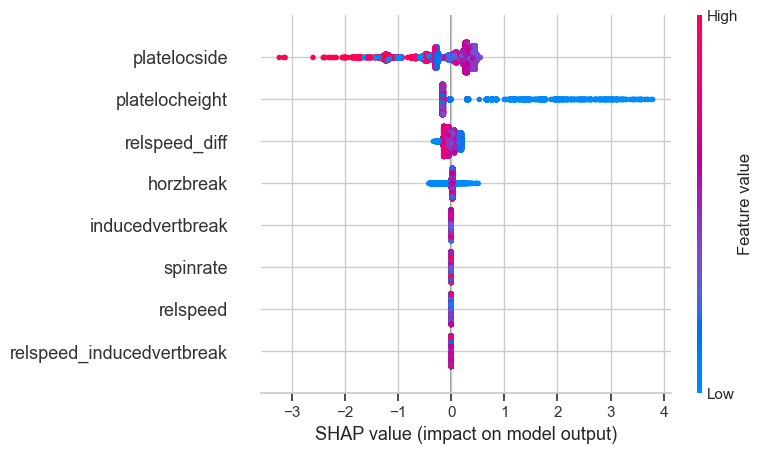

In [185]:
shap.summary_plot(shap_values, X_balanced)

## Reduced XGBoost

In [186]:
#Update the feature columns to include the new engineered features
feature_columns = ['relspeed_diff', 'horzbreak',
        'platelocside', 'platelocheight'
    ]
# Separate features and target
X = data_encoded[feature_columns]
y = data_encoded['strikeout_binary']

# Concatenate features and target for resampling
data_resampled = pd.concat([X, y], axis=1)

# Separate majority and minority classes
strikeout = data_resampled[data_resampled['strikeout_binary'] == 1]
non_strikeout = data_resampled[data_resampled['strikeout_binary'] == 0]

# Downsample majority class (non-strikeouts)
non_strikeout_downsampled = resample(non_strikeout, 
                                     replace=False,    # sample without replacement
                                     n_samples=len(strikeout),  # match minority class
                                     random_state=42)

# Combine minority class with downsampled majority class
data_balanced = pd.concat([strikeout, non_strikeout_downsampled])

# Separate features and target after resampling
X_balanced = data_balanced.drop('strikeout_binary', axis=1)
y_balanced = data_balanced['strikeout_binary']

# Feature scaling
scaler = StandardScaler()
X_balanced_scaled = scaler.fit_transform(X_balanced)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced_scaled, y_balanced, test_size=0.3, random_state=42)

In [187]:
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}

# Set up the GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_xgb_model_reduced = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the tuned XGBoost model
y_pred_best_xgb_reduced = best_xgb_model_reduced.predict(X_test)
y_pred_best_xgb_reduced_proba = best_xgb_model_reduced.predict_proba(X_test)[:, 1]

# Evaluate the tuned XGBoost model
accuracy_best_xgb_reduced = accuracy_score(y_test, y_pred_best_xgb_reduced)
precision_best_xgb_reduced = precision_score(y_test, y_pred_best_xgb_reduced, zero_division=1)
recall_best_xgb_reduced = recall_score(y_test, y_pred_best_xgb_reduced)
roc_auc_best_xgb_reduced = roc_auc_score(y_test, y_pred_best_xgb_reduced_proba)

best_params, accuracy_best_xgb_reduced, precision_best_xgb_reduced, recall_best_xgb_reduced, roc_auc_best_xgb_reduced

Fitting 3 folds for each of 81 candidates, totalling 243 fits


/Users/nathanglen/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:00:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:00:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:00:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:00:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, U

({'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8},
 0.6723006235641614,
 0.6257883672039243,
 0.8715029277813924,
 0.7240697453972001)

In [188]:
len(y_pred_best_xgb_reduced_proba[y_pred_best_xgb_reduced_proba > 0.5])

4281

In [189]:
all_pred = best_xgb_model_reduced.predict_proba(X)

In [190]:
filtered_indices = np.where(all_pred[:, 1] > 0.5)[0]
filtered_preds = all_pred[filtered_indices]
filtered_preds

array([[0.45902777, 0.54097223],
       [0.48031998, 0.51968   ],
       [0.27181172, 0.7281883 ],
       [0.39475697, 0.605243  ],
       [0.46920776, 0.53079224],
       [0.38928658, 0.6107134 ],
       [0.30314386, 0.69685614],
       [0.2609902 , 0.7390098 ],
       [0.34753823, 0.65246177],
       [0.32092673, 0.6790733 ],
       [0.37937266, 0.62062734],
       [0.3032962 , 0.6967038 ],
       [0.43905592, 0.5609441 ],
       [0.28133333, 0.7186667 ],
       [0.25746042, 0.7425396 ],
       [0.40803474, 0.59196526],
       [0.3156188 , 0.6843812 ],
       [0.33399177, 0.66600823],
       [0.26874107, 0.7312589 ],
       [0.25056976, 0.74943024],
       [0.2860415 , 0.7139585 ],
       [0.3965379 , 0.6034621 ],
       [0.25905508, 0.7409449 ],
       [0.44622487, 0.55377513],
       [0.29315007, 0.70684993],
       [0.47659928, 0.5234007 ],
       [0.4739666 , 0.5260334 ],
       [0.31803548, 0.6819645 ],
       [0.4484735 , 0.5515265 ],
       [0.40667325, 0.59332675],
       [0.

In [191]:
confusion_matrix(y_test, y_pred_best_xgb_reduced)

array([[1418, 1602],
       [ 395, 2679]])

In [192]:
# filtered_indices = np.where(all_pred[:, 1] > 0.5)[0]
# filtered_preds = all_pred[filtered_indices]
# filtered_preds

In [193]:
data_encoded

,pitcher,pitchname,pitchresult,eventtype,spinrate,relspeed,horzbreak,inducedvertbreak,platelocside,platelocheight,...,relspeed_inducedvertbreak,average_relspeed,relspeed_diff,pitchresult_category_foul,pitchresult_category_in_play,pitchresult_category_other,pitchresult_category_strike_related,spinrate_relspeed,movement_ratio,is_edge_pitch
25,"Gallen, Zac",FF,C,strikeout,2502.240234,94.112892,2.462363,18.226583,0.433979,2.300865,...,1715.356485,93.764296,0.348596,False,False,False,True,235493.065276,0.135097,0
40,"Gray, Jon",FF,C,strikeout,2257.527588,96.098084,9.364018,18.195126,-0.346139,1.675238,...,1748.516697,96.044196,0.053887,False,False,False,True,216944.074655,0.514644,0
94,"Giolito, Lucas",FF,S,strikeout,2442.560303,93.514725,5.891717,17.998758,-0.187572,3.245606,...,1683.148930,93.607192,-0.092467,False,False,False,True,228415.354371,0.327340,0
103,"Giolito, Lucas",FF,C,strikeout,2338.321289,94.639954,11.088030,17.145796,0.667325,3.362605,...,1622.677321,93.607192,1.032761,False,False,False,True,221298.618316,0.646691,0
128,"Cisnero, Jose",FF,S,strikeout,2312.854248,97.639137,12.269574,11.875773,-0.608685,3.070679,...,1159.540272,96.678168,0.960969,False,False,False,True,225825.093406,1.033159,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187396,"Greinke, Zack",FF,F,foul,2292.262451,90.186073,2.907715,17.270081,-0.060285,3.277781,...,1557.520752,90.255619,-0.069546,True,False,False,False,206730.149429,0.168367,0
187398,"Alcantara, Sandy",FF,E,home_run,2341.313232,99.597092,13.290255,14.944304,-0.707683,3.001816,...,1488.409262,98.663455,0.933636,False,False,True,False,233187.988596,0.889318,1
187402,"Pfaadt, Brandon",FF,D,single,2501.821533,94.116440,3.854095,14.275191,0.586442,1.884596,...,1343.530184,94.253497,-0.137057,False,True,False,False,235462.535751,0.269985,0
187403,"Gallegos, Giovanny",FF,B,ball,2398.320557,93.521347,10.798670,14.733393,-0.807034,4.470551,...,1377.886734,94.253438,-0.732091,False,False,False,False,224294.169148,0.732938,1


In [194]:
# y_pred_best_xgb_reduced_proba

In [218]:
# len(y_pred)

In [219]:
# len(y_train)

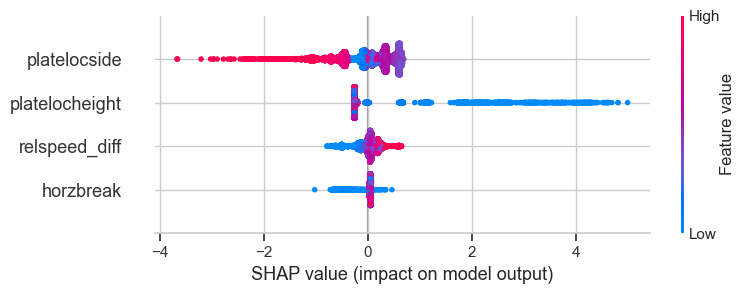

In [197]:
import shap
# Create the SHAP explainer
explainer = shap.Explainer(best_xgb_model_reduced, X_balanced)

# Calculate SHAP values for the dataset
shap_values = explainer(X_balanced)
shap.summary_plot(shap_values, X_balanced)

In [198]:
metrics_xgb = {
    'Metric': [ 'Precision', 'Recall', 'ROC AUC'],
    'Value': [round(precision_best_xgb_reduced, 2), round(recall_best_xgb_reduced, 2), round(roc_auc_best_xgb_reduced, 2)]
}
#round(accuracy_best_xgb, 2)

# Convert dictionary to a DataFrame
accuracy_metrics_xgb_reduced_df  = pd.DataFrame(metrics_xgb)

accuracy_metrics_xgb_reduced_df 

,Metric,Value
0,Precision,0.63
1,Recall,0.87
2,ROC AUC,0.72


## Files for use in the Streamlit App

In [199]:
# import pickle
# 
# # Save the model
# with open('best_xgb_model_reduced.pkl', 'wb') as file:
#     pickle.dump(best_xgb_model_reduced, file)

In [200]:
# X_balanced
# X_balanced.to_csv('data/X_balanced_reduced.csv')
# 
# data_encoded[0:16198]
# data_encoded[0:16198].to_csv('data/data_balanced_reduced.csv')

In [201]:
# X.to_csv('data/just_X.csv')
# 
# data_encoded.to_csv('data/just_data.csv')

## The rest of the stuff (Not Reduced) 

In [202]:
# import pickle
# 
# # Save the model
# with open('best_xgb_model.pkl', 'wb') as file:
#     pickle.dump(best_xgb_model, file)

In [203]:
metrics_xgb = {
    'Metric': [ 'Precision', 'Recall', 'ROC AUC'],
    'Value': [round(precision_best_xgb, 2), round(recall_best_xgb, 2), round(roc_auc_best_xgb, 2)]
}
#round(accuracy_best_xgb, 2)

# Convert dictionary to a DataFrame
accuracy_metrics_xgb_df  = pd.DataFrame(metrics_xgb)

accuracy_metrics_xgb_df 

,Metric,Value
0,Precision,0.63
1,Recall,0.85
2,ROC AUC,0.73


In [204]:
print(classification_report(y_test, y_pred_best_xgb))

              precision    recall  f1-score   support

           0       0.76      0.50      0.60      3020
           1       0.63      0.85      0.72      3074

    accuracy                           0.67      6094
   macro avg       0.70      0.67      0.66      6094
weighted avg       0.70      0.67      0.66      6094



In [205]:
# Generate the confusion matrix for the tuned XGBoost model (best from RandomizedSearchCV)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_best_xgb)

conf_matrix_xgb

array([[1505, 1515],
       [ 473, 2601]])

In [206]:
X_train

array([[-0.08799055,  0.16641853,  0.45355299, -0.76968997],
       [-0.24558551,  0.82261902, -0.98155868, -0.26046214],
       [-1.69533306, -0.52361291,  0.93705355, -1.22230017],
       ...,
       [-2.0177967 , -2.13335054,  0.95833359, -0.5099811 ],
       [-1.67054089,  0.24147818,  1.1607284 , -1.42260554],
       [ 0.85461759,  0.11131135,  0.44372204, -0.1440508 ]])

In [207]:
y_pred_best_xgb.shape

(6094,)

## OG Feature Importance

In [208]:
# from xgboost import plot_importance
# import matplotlib.pyplot as plt
# 
# # Plot the feature importance
# plt.figure(figsize=(10, 6))
# plot_importance(best_xgb_model, importance_type='weight', ax=plt.gca())
# plt.show()

In [209]:
# # Create a dictionary to map feature indices to the actual column names
# feature_names = {f"f{i}": col for i, col in enumerate(X_balanced.columns)}
# 
# # Plot feature importance with renamed features
# plt.figure(figsize=(10, 6))
# ax = plot_importance(best_xgb_model, importance_type='gain', ax=plt.gca())
# 
# # Rename the feature labels
# ax.set_yticklabels([feature_names[label.get_text()] for label in ax.get_yticklabels()])
# plt.xlabel('XGBoost Feature importance')
# plt.show()

In [210]:
# import numpy as np
# 
# # Get feature importances from the model
# importances = best_xgb_model.get_booster().get_score(importance_type='gain')
# 
# # Map the feature indices to actual column names and importance values
# feature_importances = np.array([(feature_names[feature], importance) for feature, importance in importances.items()])
# feature_importances_dict = {feature_names[feature]: importance for feature, importance in importances.items()}
# 
# # Display or use the feature_importances array
# feature_importances_dict

In [211]:
# y_pred_best_xgb_reduced

## XGBoost shap

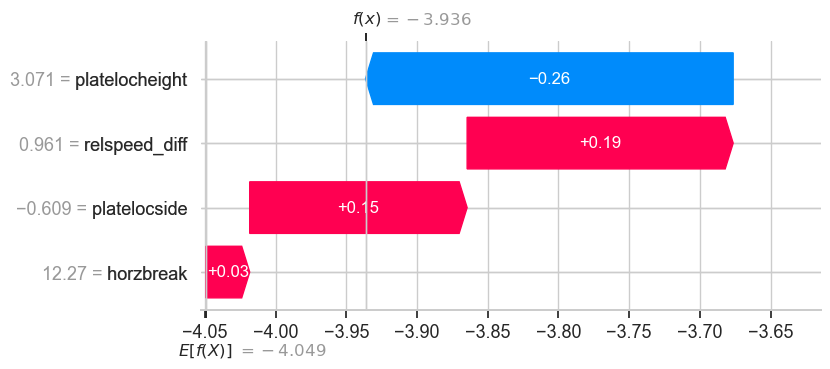

In [212]:
# Assuming X_balanced is a DataFrame or numpy array
single_instance = X_balanced.iloc[[4]]  # Replace 0 with the index of the desired observation

# Calculate SHAP values for the single instance
shap_values_single = explainer(single_instance)

# Plot SHAP values for the single observation
shap.waterfall_plot(shap_values_single[0])

In [213]:
# X_balanced
# X_balanced.to_csv('data/X_balanced.csv')

In [214]:
# data_encoded[0:16198]
# data_encoded[0:16198].to_csv('data/data_balanced.csv')

## Attempting to Create a score based on Feature Importance
- Removed pitchers that only had one pitch, because they are irrelevant to our ranking

## Creating Part of the Score for Release Speed!

## Trying to compare my score against ERA and other relevant metrics

In [215]:
# !pip install pybaseball